# Autoencoders para la detección de anomalías cardiacas 

## 1- El problema a resolver

Detectar la presencia (sujeto *anormal*) o ausencia (sujeto *normal*) de irregularidades en el ritmo cardiaco, a partir de señales electrocardiográficas (ECG):

![](https://drive.google.com/uc?export=view&id=1pzydaNRbcSh1E-S4Ebh0jJEqsim6DeM9)

El problema es que usualmente se cuenta con sets de datos **desbalanceados** con más datos normales que anormales.


## 2 El set de datos

Se usará el set [ECG5000](https://timeseriesclassification.com/description.php?Dataset=ECG5000) con 7600 datos de entrenamiento y 1900 de prueba.

Cada dato contiene un ciclo cardiaco con 140 muestras, y que puede pertenecer a una de 5 categorías:

1. Normal
2. Anormal: contracción ventricular prematura
3. Anormal: contracción supra-ventricular prematura
4. Anormal: latido ectópico
5. Anormal pero patología desconocida

![](https://drive.google.com/uc?export=view&id=1x_sUD1rbM4MM4--s9D4wacRIWEo8aAzL)


## 3- Autoencoders y detección de anomalías

El problema del set ECG5000 es que contiene 4427 datos normales y 3173 anormales, es decir está desbalanceado.

De hecho para ciertas categorías anormales (2 a 4) se tienen muy pocos datos:

| Categoría   | Nro. datos |
|-------------|------------|
| 1 (normal)  | 4427       |
| 2 (anormal) | 2683       |
| 3 (anormal) | 149        |
| 4 (anormal) | 306        |
| 5 (anormal) | 35         |

Así que en lugar de un modelo de clasificación convencional (como una Red Neuronal) se usará un Autoencoder:

![](https://drive.google.com/uc?export=view&id=1LnoIDmfctQr5wmJaojFrZEA1ygPynylu)

El autoencoder se entrenará **únicamente con datos normales**. Así, al reconstruir un dato anormal **el error será alto**.

## 4- Implementación

### 4.1. Preparación de Google Drive y lectura de los sets de entrenamiento y prueba

In [32]:
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt


In [33]:
keras.__version__

'3.0.5'

In [34]:
# from google.colab import drive
# drive.mount('/gdrive')

In [35]:
ruta = '/gdrive/MyDrive/videos/2021-06-25/'
ruta = ''

df_train = pd.read_csv(ruta + 'ECG5000_train.csv')
df_test = pd.read_csv(ruta + 'ECG5000_test.csv')

(7600, 141)
(1900, 141)


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,-1.30300,-0.83573,-1.9336,-2.09420,-2.02840,-1.2531,-0.52638,-0.089286,-0.07557,...,-1.45820,-1.6676,-1.5977,-1.67930,-1.677200,-1.69370,-1.79410,-1.35940,-2.08120,-2.82880
1,2,0.32288,-0.87847,-1.8023,-2.66850,-3.26550,-3.3326,-2.88000,-2.227400,-1.54360,...,-1.23050,-1.7218,-2.1953,-2.74890,-3.446500,-3.66210,-3.01820,-1.65140,-0.23670,0.82832
2,2,1.39340,1.59260,1.2420,0.79449,0.19577,-0.3156,-0.58053,-0.945020,-1.23350,...,-1.90850,-2.5295,-3.0614,-3.50370,-3.900400,-4.24600,-4.13380,-3.19850,-2.42200,-1.07370
3,1,-3.52270,-5.02610,-4.3613,-4.10570,-3.10420,-1.8178,-1.39840,-1.070100,-0.40691,...,0.83038,1.0084,1.1830,0.94636,0.952130,0.79343,0.84741,1.01390,0.31234,-2.19060
4,1,-1.91820,-3.22510,-3.4652,-4.00800,-3.87030,-3.3581,-2.28540,-1.728500,-1.42220,...,1.77690,1.5029,1.1651,0.46073,0.019172,-0.32739,-0.48051,-0.18814,0.14284,-0.66844


0
1    4427
2    2683
4     306
3     149
5      35
Name: count, dtype: int64

# Tu turno: como lo resolverías?

# Autoencoders

### 4.2. Sets de entrenamiento y validación

In [39]:
# Pandas a arreglos numpy
datos_train = df_train.values
datos_test = df_test.values

# Etiquetas
cat_train = datos_train[:,0]
cat_test = datos_test[:,0]

# Subdivisión por categorías
x_train_1 = datos_train[cat_train==1,1:]
x_train_2 = datos_train[cat_train==2,1:]
x_train_3 = datos_train[cat_train==3,1:]
x_train_4 = datos_train[cat_train==4,1:]
x_train_5 = datos_train[cat_train==5,1:]

x_test_1 = datos_test[cat_test==1,1:]
x_test_2 = datos_test[cat_test==2,1:]
x_test_3 = datos_test[cat_test==3,1:]
x_test_4 = datos_test[cat_test==4,1:]
x_test_5 = datos_test[cat_test==5,1:]

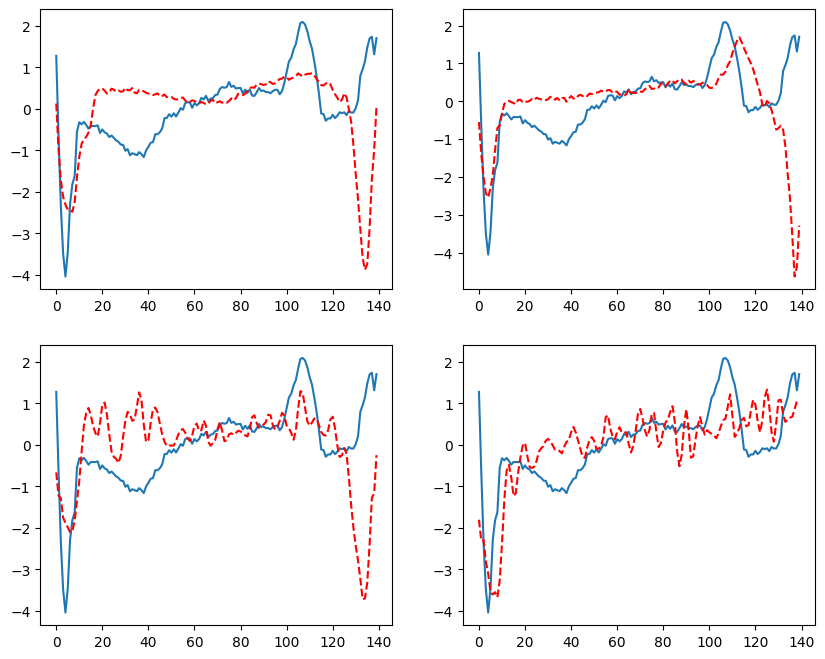

In [40]:
# Dibujar un dato normal y uno de cada anormal


ind = 10
normal = x_train_1[ind]
anormal_2 = x_train_2[ind]
anormal_3 = x_train_3[ind]
anormal_4 = x_train_4[ind]
anormal_5 = x_train_5[ind]

plt.figure(figsize=(10,8))
# plt.grid()
plt.subplot(2,2,1)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_2, 'r--')
plt.subplot(2,2,2)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_3, 'r--')
plt.subplot(2,2,3)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_4, 'r--')
plt.subplot(2,2,4)
plt.plot(np.arange(140), normal)
plt.plot(np.arange(140), anormal_5, 'r--')
plt.show()

### 4.3. Preprocesamiento (normalización)

In [41]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = 

# Entrenar el escalador con los datos de x_train_1
x_train_1_s = 
print('Mínimo y máximo originales: {:.1f}, {:.1f}'.format(np.min(x_train_1), np.max(x_train_1)))
print('Mínimo y máximo normalización: {:.1f}, {:.1f}'.format(np.min(x_train_1_s), np.max(x_train_1_s)))

# Escalar los datos de x_test_1, x_test_2, x_test_3, x_test_4, x_test_5
x_test_1_s =
x_test_2_s = 
x_test_3_s = 
x_test_4_s = 
x_test_5_s =

Mínimo y máximo originales: -7.1, 5.0
Mínimo y máximo normalización: 0.0, 1.0


### 4.4. Creación del Autoencoder en TensorFlow/Keras

In [44]:
# Crear un autoencoder con tres capas de encoder y tres de decoder
# dimensiones: input(140) -> 32 -> 16 -> 8 -> 16 -> 32 -> Output(140)

autoencoder = 

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 140)            │         4,620 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,484 (40.95 KB)

 Trainable params: 10,484 (40.95 KB)

 Non-trainable params: 0 (0.00 B)

### 4.5. Optimización y entrenamiento

La pérdida será el error absoluto medio (*Mean Absolute Error*, MAE):

$MAE = \frac{\sum_{i=1}^{140} |x_i - \hat{x_i}|}{140}$

In [45]:
# Compilar el modelo el optimizador (adam) y la función de pérdida (mae)

# Entrenar el modelo: epochs=20, batch_size=512
historia = 

Epoch 1/20


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1271 - val_loss: 0.1261
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1236 - val_loss: 0.1201
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1166 - val_loss: 0.1093
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1053 - val_loss: 0.0980
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0949 - val_loss: 0.0882
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0848 - val_loss: 0.0808
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0782 - val_loss: 0.0752
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0728 - val_loss: 0.0714
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0696 - val_loss: 0.0687
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0675 - val_loss: 0.0670
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0659 - val_loss: 0.0661
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0641 - val_loss: 0.0656
Epoch 13/20
9/9 ━━━━━━━

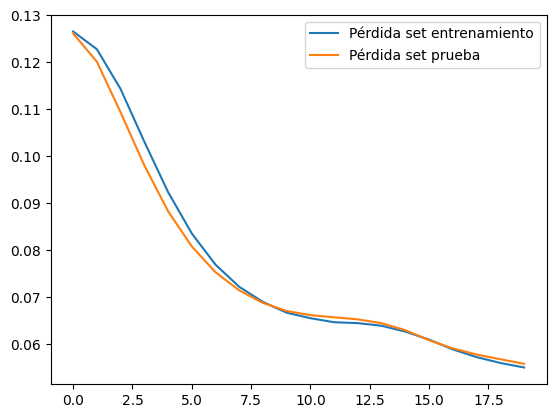

In [46]:
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.legend()

## 5- Clasificación

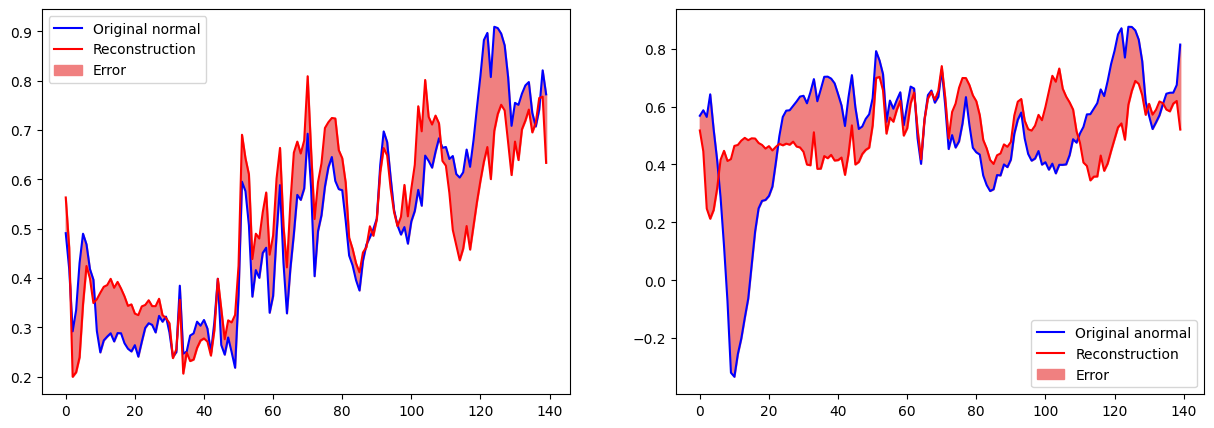

In [47]:
# ¿Qué tan bien reconstruye un dato "normal" y uno anormal?
rec_normal = autoencoder(x_test_1_s).numpy()
rec_anormal = autoencoder(x_test_5_s).numpy()

dato = 5

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(x_test_1_s[dato],'b')
plt.plot(rec_normal[dato],'r')
plt.fill_between(np.arange(140), rec_normal[dato], x_test_1_s[dato], color='lightcoral')
plt.legend(labels=["Original normal", "Reconstruction", "Error"])

plt.subplot(1,2,2)
plt.plot(x_test_5_s[dato],'b')
plt.plot(rec_anormal[dato],'r')
plt.fill_between(np.arange(140), rec_anormal[dato], x_test_5_s[dato], color='lightcoral')
plt.legend(labels=["Original anormal", "Reconstruction", "Error"])

In [48]:
# Normal

print("mae de una muestra normal: ", keras.losses.mean_absolute_error(x_test_1_s[dato], rec_normal[dato]).numpy())
print("mae de una muestra anormal: ", keras.losses.mean_absolute_error(x_test_5_s[dato], rec_anormal[dato]).numpy())


mae de una muestra normal:  0.08120746
mae de una muestra anormal:  0.17067504


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


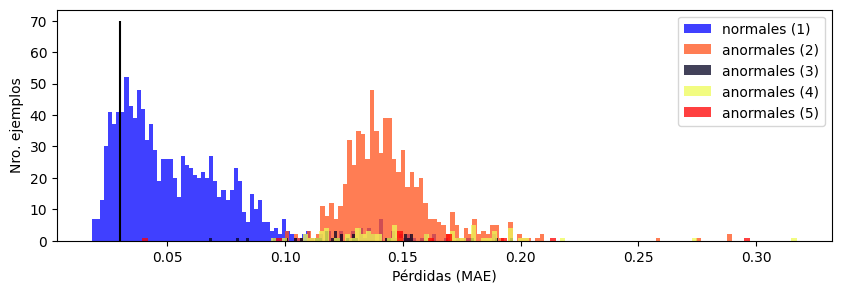

In [62]:
# Distribuciones de los errores de construcción
# para cada categoría

import tensorflow as tf

rec_1 = autoencoder.predict(x_test_1_s)
rec_2 = autoencoder.predict(x_test_2_s)
rec_3 = autoencoder.predict(x_test_3_s)
rec_4 = autoencoder.predict(x_test_4_s)
rec_5 = autoencoder.predict(x_test_5_s)

loss_1 = keras.losses.mean_absolute_error(rec_1, x_test_1_s)
loss_2 = keras.losses.mean_absolute_error(rec_2, x_test_2_s)
loss_3 = keras.losses.mean_absolute_error(rec_3, x_test_3_s)
loss_4 = keras.losses.mean_absolute_error(rec_4, x_test_4_s)
loss_5 = keras.losses.mean_absolute_error(rec_5, x_test_5_s)


plt.figure(figsize=(10,3))
plt.hist(loss_1[None,:], bins=100, alpha=0.75, label='normales (1)', color='blue')
plt.hist(loss_2[None,:], bins=100, alpha=0.75, color='#ff521b', label='anormales (2)')
plt.hist(loss_3[None,:], bins=100, alpha=0.75, color='#020122', label='anormales (3)')
plt.hist(loss_4[None,:], bins=100, alpha=0.75, color='#eefc57', label='anormales (4)')
plt.hist(loss_5[None,:], bins=100, alpha=0.75, color='r', label='anormales (5)')
plt.xlabel('Pérdidas (MAE)')
plt.ylabel('Nro. ejemplos')
plt.legend(loc='upper right')
# plt.vlines(0.08,0,70,'k')
umbral = np.mean(loss_1) + np.std(loss_1)

# Linea vertical
plt.vlines(0.03,0,70,'k')



### 5.1. Sensitividad y especificidad

- Verdaderos positivos (TP): anormales que han sido correctamente clasificados como anormales
- Falsos negativos (FN): anormales que han sido clasificados erróneamente como normales
- Verdaderos negativos (TN): normales que han sido correctamente clasificados como normales
- Falsos positivos (FP): normales que han sido clasificados erróneamente como anormales



La **precisión** mide la proporción de pacientes detectados como enfermos que realmente están enfermos:

$precisión = \frac{TP}{TP+FP}$

La **sensitividad** mide la proporción de anormales que fueron detectados correctamente como anormales. Una sensitividad del 100% detectará a todos los pacientes enfermos:

$sensitividad (Recall) = \frac{TP}{TP+FN}$

La **especificidad** mide la proporción de normales que fueron detectados correctamente como normales. Una especificidad del 100% detectará a todos los pacientes sanos:

$especificidad (Negative Recall) = \frac{TN}{TN+FP}$



In [56]:
# Calcular predicciones individuales
def predecir(modelo, datos, umbral):
    reconstrucciones = modelo(datos)
    perdida = keras.losses.mean_absolute_error(reconstrucciones, datos).numpy()
    return perdida < umbral

def calcular_sensitividad(prediccion, titulo):
    TP = np.count_nonzero(~prediccion)
    FN = np.count_nonzero(prediccion)
    sen = 100*(TP/(TP+FN))

    print(titulo + ': {:.1f}%'.format(sen))

def calcular_especificidad(prediccion, titulo):
    TN = np.count_nonzero(prediccion)
    FP = np.count_nonzero(~prediccion)
    esp = 100*(TN/(TN+FP))

    print(titulo + ': {:.1f}%'.format(esp))
    return esp

 1/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Especificidad (cat. 1, normales): 85.4%
Sensitividad (Recall) (cat. 2, anormales): 100.0%
Sensitividad (Recall) (cat. 3, anormales): 97.0%
Sensitividad (Recall) (cat. 4, anormales): 100.0%
Sensitividad (Recall) (cat. 5, anormales): 97.0%


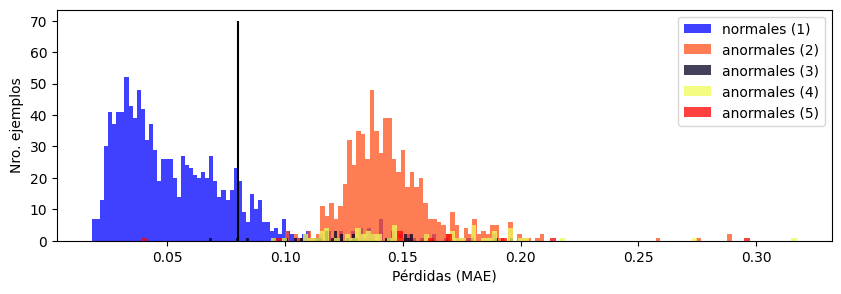

In [63]:
umbral = np.mean(loss_1) + np.std(loss_1)
umbral = 0.08


# Distribuciones de los errores de construcción
# para cada categoría

import tensorflow as tf

rec_1 = autoencoder.predict(x_test_1_s)
rec_2 = autoencoder.predict(x_test_2_s)
rec_3 = autoencoder.predict(x_test_3_s)
rec_4 = autoencoder.predict(x_test_4_s)
rec_5 = autoencoder.predict(x_test_5_s)

loss_1 = keras.losses.mean_absolute_error(rec_1, x_test_1_s)
loss_2 = keras.losses.mean_absolute_error(rec_2, x_test_2_s)
loss_3 = keras.losses.mean_absolute_error(rec_3, x_test_3_s)
loss_4 = keras.losses.mean_absolute_error(rec_4, x_test_4_s)
loss_5 = keras.losses.mean_absolute_error(rec_5, x_test_5_s)


plt.figure(figsize=(10,3))
plt.hist(loss_1[None,:], bins=100, alpha=0.75, label='normales (1)', color='blue')
plt.hist(loss_2[None,:], bins=100, alpha=0.75, color='#ff521b', label='anormales (2)')
plt.hist(loss_3[None,:], bins=100, alpha=0.75, color='#020122', label='anormales (3)')
plt.hist(loss_4[None,:], bins=100, alpha=0.75, color='#eefc57', label='anormales (4)')
plt.hist(loss_5[None,:], bins=100, alpha=0.75, color='r', label='anormales (5)')
plt.xlabel('Pérdidas (MAE)')
plt.ylabel('Nro. ejemplos')
plt.legend(loc='upper right')
# plt.vlines(0.08,0,70,'k')
# umbral = np.mean(loss_1) + np.std(loss_1)

# Linea vertical
plt.vlines(umbral,0,70,'k')

# Diferencia entre especificidad y sensibilidad
# Dónde pondrías el umbral en el caso de la primera ola de la pandemia?
# Y en el caso de una detección de problemas cardiacos en un apple watch?

# Predicciones
pred_1 = predecir(autoencoder, x_test_1_s, umbral)
pred_2 = predecir(autoencoder, x_test_2_s, umbral)
pred_3 = predecir(autoencoder, x_test_3_s, umbral)
pred_4 = predecir(autoencoder, x_test_4_s, umbral)
pred_5 = predecir(autoencoder, x_test_5_s, umbral)

# Pred1: especificidad
esp_1 = calcular_especificidad(pred_1,'Especificidad (cat. 1, normales)')

# Pred 2 a 5: sensitividad
sen_2 = calcular_sensitividad(pred_2,'Sensitividad (Recall) (cat. 2, anormales)')
sen_3 = calcular_sensitividad(pred_3,'Sensitividad (Recall) (cat. 3, anormales)')
sen_4 = calcular_sensitividad(pred_4,'Sensitividad (Recall) (cat. 4, anormales)')
sen_5 = calcular_sensitividad(pred_3,'Sensitividad (Recall) (cat. 5, anormales)')